In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:HackBio\\Compiled HNF1A data.csv',index_col=False, skipinitialspace=True)
data.head(900)

,PubMed ID,Population,Sub-Population (if any),dbSNP,HGVS NM,HGVS NP,Nucleotide Change,Protein Change,Ref,Alt,Frequency (Ref),Frequency (Alt),Additional Comments,Curator,Co-Curator
0,34393998,Africa,Tunisia,rs1800574,NaN,NaN,c.710A>G,NaN,C,T,0.9906,0.0094,NaN,Rachna,NaN
1,34393998,Africa,Tunisia,rs1172328722,NaN,NaN,c.476G>A,NaN,G,A,1,0,NaN,Rachna,NaN
2,34393998,Africa,Tunisia,NaN,NaN,NaN,c.710A>G,NaN,NaN,NaN,NaN,NaN,rs id not found,Rachna,NaN
3,34373539,Asia,Kuwait,rs587776825,NaN,NaN,c.872dupC,NaN,duplication event,NaN,1,0,NaN,Rachna,Chinaza
4,34373539,Asia,Kuwait,NaN,NaN,NaN,c.8C > A,NaN,NaN,NaN,NaN,NaN,rs id not found,Rachna,Chinaza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,10868881,Asia,US and Australian,NaN,NaN,NaN,NaN,P12A,NaN,NaN,NaN,NaN,NaN,Fogunfile,Chinaza
895,10843190,Other,Oji-Cree population,NaN,NaN,NaN,NaN,G319S,G,A,1,0,NaN,Fogunfile,Chinaza
896,10754480,Europe,Spain,NaN,NaN,NM_000545.6:c.779C>T,NP_000536.5:p.Thr260Met,T260M,C,T,1,0,NaN,Dibyendu,NaN
897,10690959,Africa,Africa America,NaN,NaN,NM_000545.8:c.155G>C,NP_000536.6:p.Gly52Ala,G52A,G,C,0.9972,0.0028,NaN,Dibyendu,NaN


In [3]:
dataset = [i.strip() for i in data.columns]

In [4]:
Dataset = data[dataset]


In [5]:
Dataset.head(900)

,PubMed ID,Population,Sub-Population (if any),dbSNP,HGVS NM,HGVS NP,Nucleotide Change,Protein Change,Ref,Alt,Frequency (Ref),Frequency (Alt),Additional Comments,Curator,Co-Curator
0,34393998,Africa,Tunisia,rs1800574,NaN,NaN,c.710A>G,NaN,C,T,0.9906,0.0094,NaN,Rachna,NaN
1,34393998,Africa,Tunisia,rs1172328722,NaN,NaN,c.476G>A,NaN,G,A,1,0,NaN,Rachna,NaN
2,34393998,Africa,Tunisia,NaN,NaN,NaN,c.710A>G,NaN,NaN,NaN,NaN,NaN,rs id not found,Rachna,NaN
3,34373539,Asia,Kuwait,rs587776825,NaN,NaN,c.872dupC,NaN,duplication event,NaN,1,0,NaN,Rachna,Chinaza
4,34373539,Asia,Kuwait,NaN,NaN,NaN,c.8C > A,NaN,NaN,NaN,NaN,NaN,rs id not found,Rachna,Chinaza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,10868881,Asia,US and Australian,NaN,NaN,NaN,NaN,P12A,NaN,NaN,NaN,NaN,NaN,Fogunfile,Chinaza
895,10843190,Other,Oji-Cree population,NaN,NaN,NaN,NaN,G319S,G,A,1,0,NaN,Fogunfile,Chinaza
896,10754480,Europe,Spain,NaN,NaN,NM_000545.6:c.779C>T,NP_000536.5:p.Thr260Met,T260M,C,T,1,0,NaN,Dibyendu,NaN
897,10690959,Africa,Africa America,NaN,NaN,NM_000545.8:c.155G>C,NP_000536.6:p.Gly52Ala,G52A,G,C,0.9972,0.0028,NaN,Dibyendu,NaN


In [6]:
Dataset.drop(['Sub-Population (if any)','PubMed ID','HGVS NM','HGVS NP','Ref','Alt','Nucleotide Change','Protein Change','Additional Comments','Curator','Co-Curator'],axis=1,inplace=True)

In [7]:
Dataset.head(900)

,Population,dbSNP,Frequency (Ref),Frequency (Alt)
0,Africa,rs1800574,0.9906,0.0094
1,Africa,rs1172328722,1,0
2,Africa,NaN,NaN,NaN
3,Asia,rs587776825,1,0
4,Asia,NaN,NaN,NaN
...,...,...,...,...
894,Asia,NaN,NaN,NaN
895,Other,NaN,1,0
896,Europe,NaN,1,0
897,Africa,NaN,0.9972,0.0028


In [8]:
data1 = Dataset.dropna(subset =['Population','dbSNP','Frequency (Ref)','Frequency (Alt)'])

In [9]:
data1.isnull().sum()

Population         0
dbSNP              0
Frequency (Ref)    0
Frequency (Alt)    0
dtype: int64

In [10]:
data1.describe()

,Population,dbSNP,Frequency (Ref),Frequency (Alt)
count,305,305,305,305
unique,6,127,100,111
top,Europe,rs587776825,1,0
freq,162,22,132,127


In [11]:
data['Population'].value_counts()

Europe       369
America      303
Asia         133
Africa        17
Other          4
Australia      2
Name: Population, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
data1.Population=label_encoder.fit_transform(data1.Population)

C:\Users\ShrutiKirti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population', ylabel='count'>

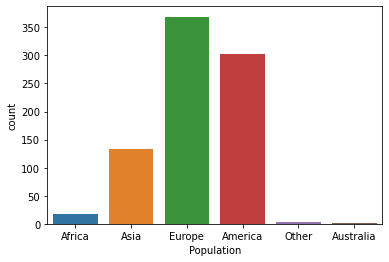

In [15]:
sns.countplot(data['Population'])

In [13]:
data1.head(10)

,Population,dbSNP,Frequency (Ref),Frequency (Alt)
0,0,rs1800574,0.9906,0.0094
1,0,rs1172328722,1,0
3,2,rs587776825,1,0
5,4,rs193922606,0.99994,0
6,4,rs587776825,0.99957,0.00043
7,4,rs769086289,1,0
8,2,rs193922585,1,0
14,0,rs140491072,0.9986,0.0014
15,0,rs115080759,0.9947,0.0053
16,0,rs142318174,0.9969,0.0031


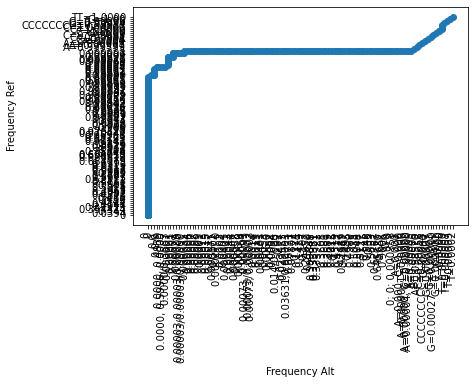

In [14]:
x= data1['Frequency (Alt)']
y= data1['Frequency (Ref)']
plt.figure()
plt.scatter(np.sort(x), np.sort(y))
plt.xlabel('Frequency Alt')
plt.ylabel('Frequency Ref')
plt.xticks(rotation = 90)
plt.show()
plt.close()

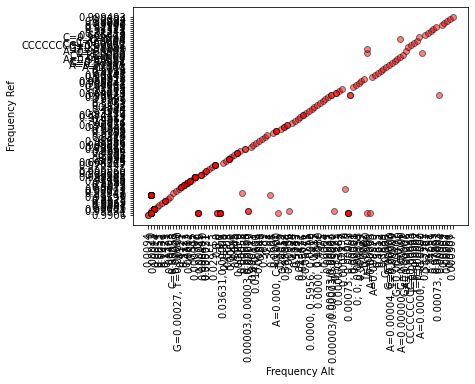

In [15]:
x= data1['Frequency (Alt)']
y= data1['Frequency (Ref)']
plt.figure()
plt.scatter(x, y, c='r', alpha=0.5, edgecolor='k')
plt.xlabel('Frequency Alt')
plt.ylabel('Frequency Ref')
plt.xticks(rotation = 90)
plt.show()
plt.close()

In [16]:
x= data1['Frequency (Alt)']
y= data1['Population']

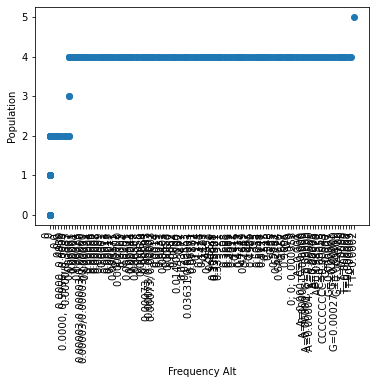

In [17]:
plt.figure()
plt.scatter(np.sort(x), np.sort(y))
plt.xlabel('Frequency Alt')
plt.ylabel('Population')
plt.xticks(rotation = 90)
plt.show()
plt.close()

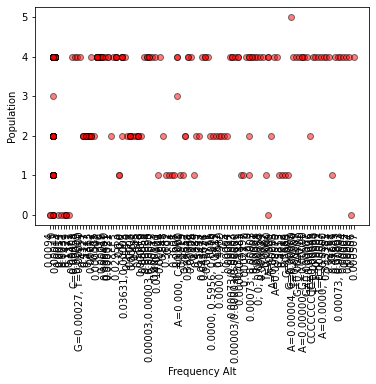

In [18]:
plt.figure()
plt.scatter(x, y, c='r', alpha=0.5, edgecolor='k')
plt.xlabel('Frequency Alt')
plt.ylabel('Population')
plt.xticks(rotation = 90)
plt.show()
plt.close()

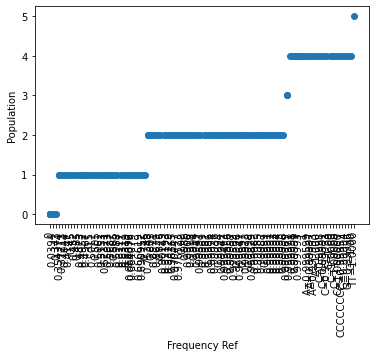

In [19]:
x= data1['Frequency (Ref)']
y= data1['Population']
plt.figure()
plt.scatter(np.sort(x), np.sort(y))
plt.xlabel('Frequency Ref')
plt.ylabel('Population')
plt.xticks(rotation = 90)
plt.show()
plt.close()

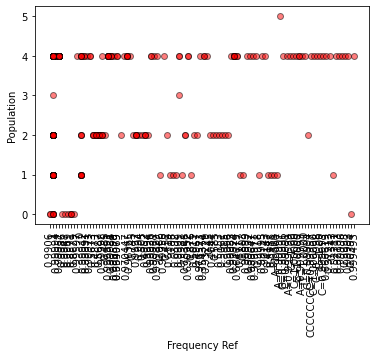

In [20]:
x= data1['Frequency (Ref)']
y= data1['Population']
plt.figure()
plt.scatter(x, y, c='r', alpha=0.5, edgecolor='k')
plt.xlabel('Frequency Ref')
plt.ylabel('Population')
plt.xticks(rotation = 90)
plt.show()
plt.close()

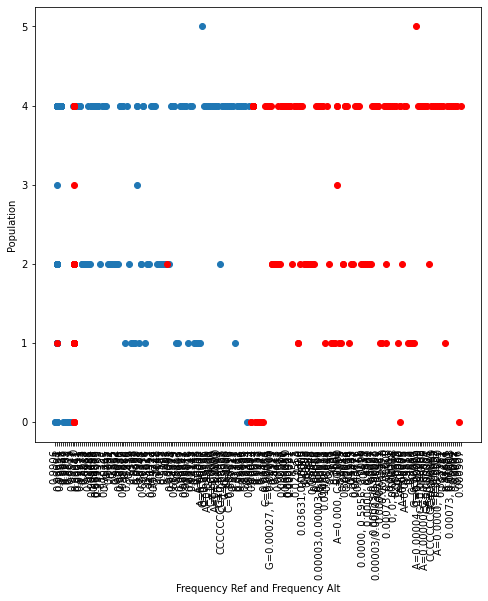

In [21]:
plt.figure(figsize=(8, 8))
x= data1['Frequency (Ref)']
y= data1['Population']
plt.scatter(x, y)
plt.xticks(rotation = 45)
x= data1['Frequency (Alt)']
y= data1['Population']
plt.scatter(x, y,color= 'Red')
plt.xticks(rotation = 90)
plt.xlabel('Frequency Ref and Frequency Alt')
plt.ylabel('Population')
plt.show()

